## CARGAMOS LOS DATOS

In [4]:
import preprocess_data as pr_data
import pandas as pd
from tensorboard import notebook


In [5]:
from preprocess_data import load_data

In [1]:
%load_ext tensorboard

In [4]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

df=load_data(genres)

## EXTRAEMOS CARACTERÍSTICAS

In [5]:
df=pr_data.extract_mfcc(df)

In [6]:
## Desagregamos los datos
df[['MFCC_1','MFCC_2','MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
    'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 
    'MFCC_20']] = pd.DataFrame(df.MFCC.values.tolist(), index= df.index)

df = df.drop(['MFCC'], axis = 1)

## MODELO DENSE

In [7]:
from model import Model

Using TensorFlow backend.


======================] - 0s 7ms/step - loss: 0.7373 - accuracy: 0.7374 - val_loss: 1.1071 - val_accuracy: 0.6333

Epoch 00722: val_accuracy did not improve from 0.64000
Epoch 723/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.8109 - accuracy: 0.7161 - val_loss: 1.1072 - val_accuracy: 0.6333

Epoch 00723: val_accuracy did not improve from 0.64000
Epoch 724/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.7682 - accuracy: 0.7317 - val_loss: 1.1076 - val_accuracy: 0.6333

Epoch 00724: val_accuracy did not improve from 0.64000
Epoch 725/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.8004 - accuracy: 0.7194 - val_loss: 1.1083 - val_accuracy: 0.6333

Epoch 00725: val_accuracy did not improve from 0.64000
Epoch 726/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.7383 - accuracy: 0.7466 - val_loss: 1.1076 - val_accuracy: 0.6333

Epoch 00726: val_accuracy did not improve from 0.64000
Epoch 727/1000
10/10 [========

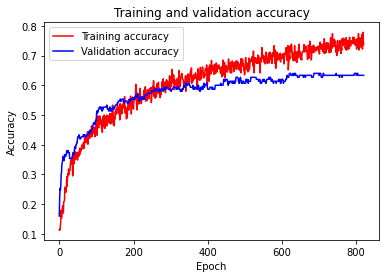

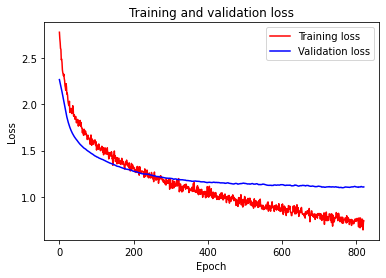

In [8]:
model_pr=Model('DENSE',df,1000,patience=200)

##Preprocesamos los datos para la LSTM

model_pr.preprocess_DENSE()

### Entrenamos el modelo

model_pr.train()

In [6]:
%tensorboard --logdir logs_DENSE


Reusing TensorBoard on port 6006 (pid 1418), started 0:53:50 ago. (Use '!kill 1418' to kill it.)

In [7]:
notebook.list() # Listamos los tensorboards que tenemos

Known TensorBoard instances:
  - port 6006: logdir logs_DENSE (started 0:53:53 ago; pid 1418)
  - port 6006: logdir logs_CNN (started 0:08:17 ago; pid 2081)


In [8]:
## Escogemos el tensorboard para este caso
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir logs_CNN (started 0:08:18 ago; port 6006, pid 2081).


## MODELO LSTM

In [7]:
from model import Model

Using TensorFlow backend.


1 - val_loss: 1.6111 - val_accuracy: 0.4933

Epoch 00901: val_accuracy did not improve from 0.51333
Epoch 902/1000
10/10 [==============================] - 0s 17ms/step - loss: 1.1465 - accuracy: 0.5964 - val_loss: 1.6555 - val_accuracy: 0.4933

Epoch 00902: val_accuracy did not improve from 0.51333
Epoch 903/1000
10/10 [==============================] - 0s 17ms/step - loss: 1.2220 - accuracy: 0.5599 - val_loss: 1.6204 - val_accuracy: 0.4933

Epoch 00903: val_accuracy did not improve from 0.51333
Epoch 904/1000
10/10 [==============================] - 0s 17ms/step - loss: 1.1649 - accuracy: 0.5851 - val_loss: 1.6577 - val_accuracy: 0.4933

Epoch 00904: val_accuracy did not improve from 0.51333
Epoch 905/1000
10/10 [==============================] - 0s 17ms/step - loss: 1.1963 - accuracy: 0.5848 - val_loss: 1.6253 - val_accuracy: 0.4867

Epoch 00905: val_accuracy did not improve from 0.51333
Epoch 906/1000
10/10 [==============================] - 0s 16ms/step - loss: 1.1735 - accuracy: 

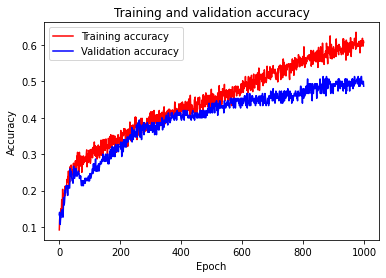

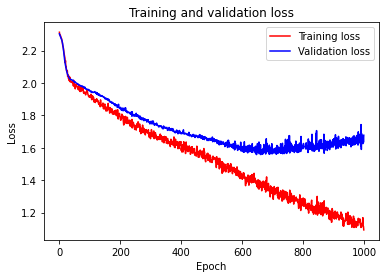

In [20]:
model_pr=Model('LSTM',df,1000,patience=300)

##Preprocesamos los datos para la LSTM

model_pr.preprocess_LSTM()

### Entrenamos el modelo

model_pr.train()

In [9]:
%tensorboard --logdir logs_LSTM


Reusing TensorBoard on port 6006 (pid 16433), started 5:24:03 ago. (Use '!kill 16433' to kill it.)

In [10]:
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs (started 5:46:06 ago; pid 16161)
  - port 6006: logdir /path/to/log/folder (started 7:54:32 ago; pid 13959)
  - port 6006: logdir logs_LSTM (started 5:24:07 ago; pid 16433)
  - port 6007: logdir logs_CNN (started 5:18:16 ago; pid 16505)


In [11]:
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir logs_LSTM (started 5:24:13 ago; port 6006, pid 16433).


## MODELO CNN

In [9]:
from model import Model

In [10]:
model_cnn=Model('CNN',df,10)


In [11]:
## Hacemos que cargue el x_train y el y_train,...
model_cnn.preprocess_CNN()


Epoch 1/10
13/13 [==============================] - 27s 2s/step - loss: 4.3858 - accuracy: 0.0844 - val_loss: 3.2204 - val_accuracy: 0.0900

Epoch 00001: val_accuracy improved from -inf to 0.09000, saving model to best_model_CNN.h5
Epoch 2/10
13/13 [==============================] - 26s 2s/step - loss: 3.7834 - accuracy: 0.1591 - val_loss: 3.0250 - val_accuracy: 0.0650

Epoch 00002: val_accuracy did not improve from 0.09000
Epoch 3/10
13/13 [==============================] - 26s 2s/step - loss: 3.6391 - accuracy: 0.1795 - val_loss: 2.7074 - val_accuracy: 0.0700

Epoch 00003: val_accuracy did not improve from 0.09000
Epoch 4/10
13/13 [==============================] - 26s 2s/step - loss: 3.5742 - accuracy: 0.1693 - val_loss: 2.4221 - val_accuracy: 0.1550

Epoch 00004: val_accuracy improved from 0.09000 to 0.15500, saving model to best_model_CNN.h5
Epoch 5/10
13/13 [==============================] - 26s 2s/step - loss: 3.3452 - accuracy: 0.1915 - val_loss: 2.1012 - val_accuracy: 0.2100



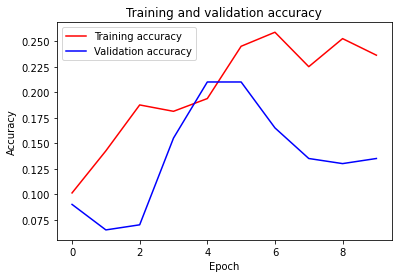

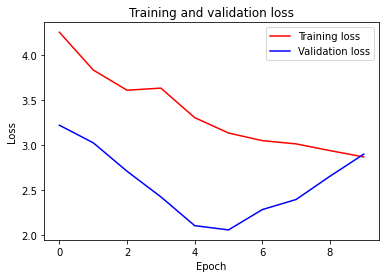

In [12]:
model_cnn.train()

In [13]:
%tensorboard --logdir logs_CNN


In [14]:
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs_DENSE (started 0:45:38 ago; pid 1418)
  - port 6006: logdir logs_CNN (started 0:00:02 ago; pid 2081)


In [15]:
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir logs_CNN (started 0:00:05 ago; port 6006, pid 2081).


## MODELO CNN Y LSTM

In [12]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,LSTM,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU, BatchNormalization,MaxPooling2D,GlobalAveragePooling2D,TimeDistributed


from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import tensorflow


In [19]:
 
model = Sequential()
model.add(TimeDistributed(Conv2D(filters = 16, kernel_size = 2, input_shape = (model_cnn._X_train.shape[1], 1320, 1))))
#model2.add(BatchNormalization())
#model2.add(LeakyReLU(alpha = 0.01))
model.add(TimeDistributed(MaxPooling2D(pool_size = 2)))
model.add(Dropout(0.5))

# define LSTM model
model.add(LSTM(128))
model.add(Dense(10,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
input_shape = (model_cnn._X_train.shape[1], 1320, 1)
model.build(input_shape) 
model.summary()

ValueError: Input 0 of layer conv2d_8 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (66000, 1)

In [65]:
import keras
from tensorflow.keras.layers import Input ,Dense, Dropout, Activation, LSTM
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow.keras.models import Model
import keras.backend as K


import numpy as np

timesteps=100
number_of_samples=2500
nb_samples=number_of_samples
frame_row=32
frame_col=32
channels=3

nb_epoch=1
batch_size=timesteps

data= np.random.random((2500,timesteps,frame_row,frame_col,channels))
label=np.random.random((2500,timesteps,1))

X_train=data[0:2000,:]
y_train=label[0:2000]

X_test=data[2000:,:]
y_test=label[2000:,:]

#%%

model=Sequential();                          

model.add(TimeDistributed(Conv2D(filters=32, kernel_size=3), input_shape=(32,50,1320,1)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Conv2D(32, 3, 3)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Flatten()))
model.add(TimeDistributed(Dense(512)))
#output dimension here is (None, 100, 512)                

model.add(TimeDistributed(Dense(35, name="first_dense" )))
#output dimension here is (None, 100, 35)                


model.add(LSTM(128,return_sequences=False))
#output dimension here is (None, 100, 20)

time_distributed_merge_layer = Lambda(function=lambda x: K.mean(x, axis=0, keepdims=False) , output_shape=(None, 20)) 

model.add(time_distributed_merge_layer)
#output dimension here is (None, 1, 20)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid', input_shape=(None,20)))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [66]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_122 (TimeDi (None, 32, 48, 1318, 32)  320       
_________________________________________________________________
time_distributed_123 (TimeDi (None, 32, 48, 1318, 32)  0         
_________________________________________________________________
time_distributed_124 (TimeDi (None, 32, 16, 439, 32)   9248      
_________________________________________________________________
time_distributed_125 (TimeDi (None, 32, 16, 439, 32)   0         
_________________________________________________________________
time_distributed_126 (TimeDi (None, 32, 8, 219, 32)    0         
_________________________________________________________________
time_distributed_127 (TimeDi (None, 32, 8, 219, 32)    0         
_________________________________________________________________
time_distributed_128 (TimeDi (None, 32, 56064)       

In [67]:
model.fit(model_cnn._X_train,model_cnn._y_train)

ValueError: in user code:

    /Users/alejandropolo/opt/anaconda3/envs/CNN/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/alejandropolo/opt/anaconda3/envs/CNN/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/alejandropolo/opt/anaconda3/envs/CNN/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/alejandropolo/opt/anaconda3/envs/CNN/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/alejandropolo/opt/anaconda3/envs/CNN/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/alejandropolo/opt/anaconda3/envs/CNN/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/alejandropolo/opt/anaconda3/envs/CNN/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/alejandropolo/opt/anaconda3/envs/CNN/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/alejandropolo/opt/anaconda3/envs/CNN/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:223 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_29 is incompatible with the layer: expected ndim=5, found ndim=4. Full shape received: (32, 50, 1320, 1)


In [69]:
import tensorflow as tf
model = tf.keras.Sequential([
tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(100,100,3),name="conv1")),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=2)),

tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu')),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=2)),
tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(filters=256, kernel_size=2, padding='same', activation='relu')),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=2)),

tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Dense(200, activation="relu"), 
tf.keras.layers.Dense(10, activation= "softmax") 
])